In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="6"

In [2]:
import cv2
from PIL import  Image
import numpy as np

In [3]:
image_directory = '/data1/hom1/ict06/Br35H Brain Tumor Detection 2020/dataset/'

dataset=[]
label=[]

no_tumor_images = os.listdir('/data1/hom1/ict06/Br35H Brain Tumor Detection 2020/dataset/no')
yes_tumor_images = os.listdir('/data1/hom1/ict06/Br35H Brain Tumor Detection 2020/dataset/yes')

In [4]:
for i , image_name in enumerate(no_tumor_images):
  if(image_name.split('.')[1]== 'jpg'):
      image=cv2.imread(image_directory+'no/'+image_name)
      image=Image.fromarray(image, 'RGB')
      image=image.resize((224,224))
      dataset.append(np.array(image))
      label.append(0)

In [5]:
for i , image_name in enumerate(yes_tumor_images):
  if(image_name.split('.')[1]== 'jpg'):
      image=cv2.imread(image_directory+'yes/'+image_name)
      image=Image.fromarray(image, 'RGB')
      image=image.resize((224,224))
      dataset.append(np.array(image))
      label.append(1)

In [6]:
print(len(dataset))
print(len(label))
dataset=np.array(dataset)
label=np.array(label)

3000
3000


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 224, 224, 3)
(600, 224, 224, 3)
(2400,)
(600,)


In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import normalize
#x_train= normalize(x_train, axis=1)
#x_test = normalize(x_test, axis=1)
from tensorflow.keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01, patience=3, min_lr=1e-5)

2022-01-11 13:20:19.574384: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [9]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0
inc=EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)

2022-01-11 13:20:20.470633: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-01-11 13:20:20.552254: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: RTX A5000 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 64 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 715.34GiB/s
2022-01-11 13:20:20.552290: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-01-11 13:20:20.554301: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-01-11 13:20:20.554340: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-01-11 13:20:20.555294: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2022

In [10]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

#inc.add(Dense(128,activation=('relu'))) 
#inc.add(dropout(0.2)
for i in inc.layers:
  i.trainable=False

x=Flatten()(inc.output)
prediction=Dense(1, activation='sigmoid')(x)

In [11]:
from tensorflow.keras.models import Model
model=Model(inputs=inc.input, outputs=prediction)

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
hist=model.fit(x_train, y_train, batch_size=32, 
               verbose=1, epochs=50, 
               validation_data=(x_test,y_test), shuffle=False,
              callbacks=[lrr])

model.save('/data1/hom1/ict06/Models/expirement.h5')

2022-01-11 13:20:22.959190: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-11 13:20:22.980231: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2799860000 Hz


Epoch 1/50


2022-01-11 13:20:26.056348: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-01-11 13:20:26.669384: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2022-01-11 13:20:27.579366: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-01-11 13:20:28.326174: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


75/75 [==============================] - 9s 47ms/step - loss: 0.3830 - accuracy: 0.8950 - val_loss: 0.2561 - val_accuracy: 0.9250
Epoch 2/50
75/75 [==============================] - 2s 29ms/step - loss: 0.0767 - accuracy: 0.9758 - val_loss: 0.0931 - val_accuracy: 0.9733
Epoch 3/50
75/75 [==============================] - 2s 29ms/step - loss: 0.0408 - accuracy: 0.9862 - val_loss: 0.1055 - val_accuracy: 0.9717
Epoch 4/50
75/75 [==============================] - 2s 29ms/step - loss: 0.0292 - accuracy: 0.9900 - val_loss: 0.1218 - val_accuracy: 0.9667
Epoch 5/50
75/75 [==============================] - 2s 29ms/step - loss: 0.0248 - accuracy: 0.9917 - val_loss: 0.0840 - val_accuracy: 0.9800
Epoch 6/50
75/75 [==============================] - 2s 29ms/step - loss: 0.0163 - accuracy: 0.9937 - val_loss: 0.1022 - val_accuracy: 0.9750
Epoch 7/50
75/75 [==============================] - 2s 30ms/step - loss: 0.0085 - accuracy: 0.9975 - val_loss: 0.0774 - val_accuracy: 0.9883
Epoch 8/50
75/75 [======

/compuworks/anaconda3/envs/jupyter-tf2/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy,lr
0,0.382974,0.895000,0.256109,0.925000,0.00100
1,0.076675,0.975833,0.093062,0.973333,0.00100
2,0.040777,0.986250,0.105541,0.971667,0.00100
3,0.029229,0.990000,0.121804,0.966667,0.00100
4,0.024816,0.991667,0.083981,0.980000,0.00100
5,0.016336,0.993750,0.102237,0.975000,0.00100
6,0.008518,0.997500,0.077361,0.988333,0.00100
7,0.015988,0.993750,0.078218,0.985000,0.00100
8,0.012656,0.995833,0.057509,0.988333,0.00100
9,0.004523,0.999167,0.083815,0.988333,0.00100


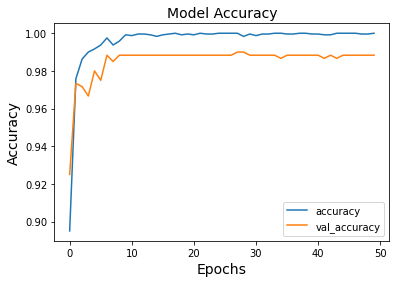

In [17]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.title("Model Accuracy",fontsize=14)
plt.ylabel("Accuracy",fontsize=14)
plt.xlabel("Epochs",fontsize=14)
plt.savefig('accuracy3.png', dpi=300, bbox_inches='tight')

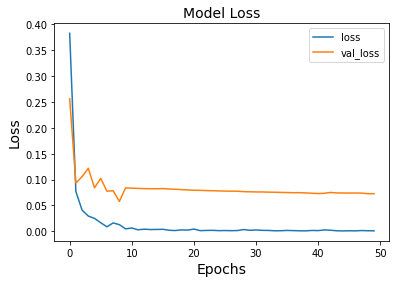

In [18]:
metrics[['loss', 'val_loss']].plot()
plt.title("Model Loss",fontsize=14)
plt.ylabel("Loss",fontsize=14)
plt.xlabel("Epochs",fontsize=14)
plt.savefig('Loss3.png', dpi=300, bbox_inches='tight')

In [19]:
df = pd.DataFrame(metrics)
df.to_csv('metrices3.csv')

In [20]:
_, acc= model.evaluate(x_test,y_test)
print("Accuracy =", (acc * 100.0), "%")

19/19 [==============================] - 1s 24ms/step - loss: 0.0726 - accuracy: 0.9883
Accuracy = 98.83333444595337 %


In [21]:
mythreshold= 0.5
from sklearn.metrics import confusion_matrix
y_pred= (model.predict(x_test)>= mythreshold).astype(int)
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[340   3]
 [  4 253]]


Text(0.5, 15.0, 'Predicted Label')

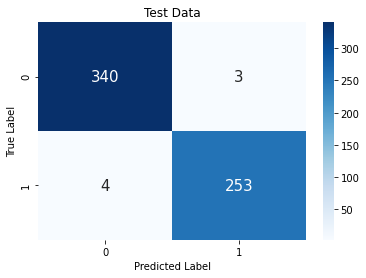

In [22]:
import seaborn as sns
sns.heatmap(cm, annot=True , cmap="Blues" , fmt="d", cbar=True, annot_kws={"size":15})
plt.title("Test Data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

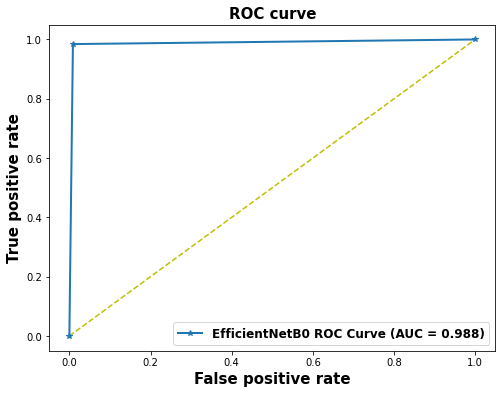

In [35]:
import matplotlib.pyplot as plt

import matplotlib.font_manager as font_manager

font = font_manager.FontProperties(
                                   weight='bold',
                                   style='normal', size=12)
from sklearn.metrics import roc_curve
y_preds = model.predict(x_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, label= "EfficientNetB0 ROC Curve (AUC = 0.988)" , marker='*', linewidth=2, markersize=6)
plt.xlabel('False positive rate', fontweight='bold',fontsize=15)
plt.ylabel('True positive rate',fontweight='bold',fontsize=15)
plt.title('ROC curve',fontweight='bold',fontsize=15)
plt.legend(loc="best" , prop=font)
plt.gcf().set_size_inches(8, 6)
plt.savefig('ROCplot3.png', dpi=300, bbox_inches='tight')
plt.show()

In [36]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.9878447209901193


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       343
           1       0.99      0.98      0.99       257

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600

